In [6]:
import numpy as np
from networks.interest_calculator import InterestCalculator
from networks.er_network import ErNetwork
import matplotlib.pyplot as plt
from ponzi_simulation import PonziSimulation

In [3]:
erNet = ErNetwork(k_avg=5, n_nodes=10000, capital_per_person=100, ponzi_capital=5000)

erNet.build()
erNet.save_json('my_networks/er1.json')

Building ER network...
Network salvato in my_networks/er1.json


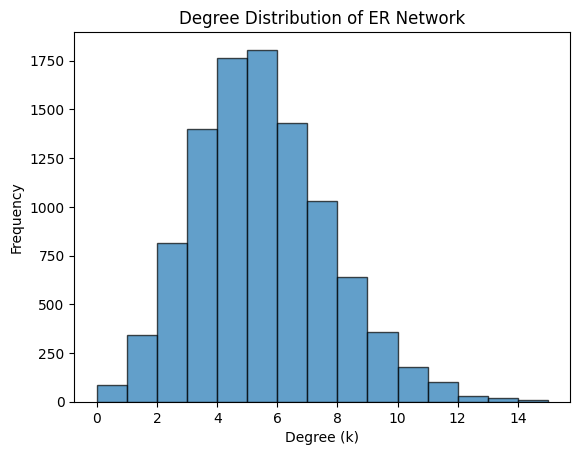

In [4]:
k_values = erNet.k_distribution()
plt.hist(k_values, bins=range(min(k_values), max(k_values) + 1), edgecolor='black', alpha=0.7)
plt.xlabel('Degree (k)')
plt.ylabel('Frequency')
plt.title('Degree Distribution of ER Network')
plt.show()

Starting simulation with lambda=<function <lambda> at 0x000001C6B2F68360>, mu=<function <lambda> at 0x000001C6B2F68400>
5.00% complete
10.00% complete
15.28% complete
20.28% complete
25.28% complete
30.28% complete
35.28% complete
40.28% complete
45.28% complete
50.28% complete
55.28% complete
60.56% complete
65.56% complete
70.56% complete
75.83% complete
80.83% complete
86.11% complete


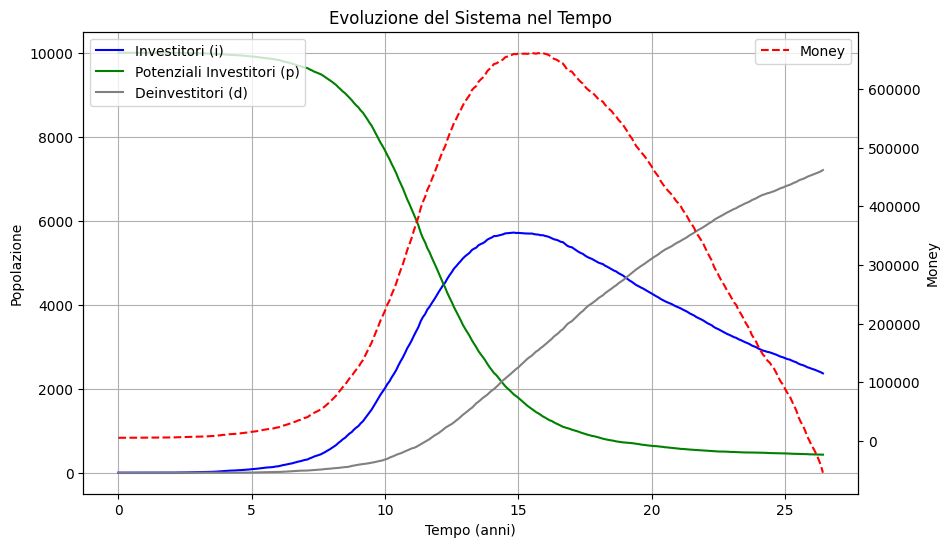

In [7]:
interest_calculator = InterestCalculator(r_p = lambda t: 0.1, r_r = lambda t: 0.05)

ponzi = PonziSimulation(
    network = erNet,
    interest_calculator = interest_calculator,
    max_time_units = 30 * 12,
    dt = 1. / 12,
    lambda_ = lambda t: 0.2,
    mu = lambda t: 0.1,
    capital_per_person = 100,
    ponzi_capital = 5000)

ponzi_capital, investor, potential, deinvestor, degrees_money = ponzi.simulate_ponzi()

ponzi.graph('test')

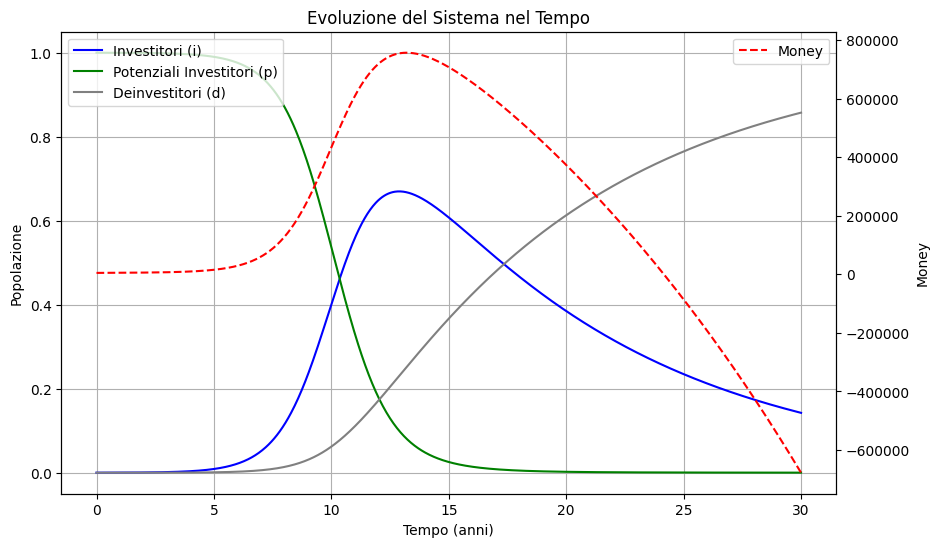

In [10]:
from differential_equations_2 import DifferentialEquations2

diff = DifferentialEquations2(
    rp = interest_calculator.r_p,
    rr = interest_calculator.r_r,
    lambda_ = lambda t: 0.2,
    mu = lambda t: 0.1,
    M = 100,
    ponzi_capital = 5000,
    N=10000, avg_k=5)

diff.solve_densities(0, 30, 1000)

diff.graph('asd')
